In [ ]:
# Import necessary libraries
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the Fashion MNIST dataset
# The dataset contains 70,000 grayscale images of 28x28 pixels, split into training and test sets
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [ ]:
# Reshape the data to include a channel dimension (needed for Conv2D layers)
# New shape: (num_samples, 28, 28, 1)
train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0  # Normalize pixel values to [0,1]
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0    # Normalize pixel values to [0,1]


In [ ]:
# Convert labels to integers (they already are, but this ensures correct dtype)
train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)

In [ ]:
model = Sequential()
# Add a 2D convolutional layer with 64 filters, kernel size 3x3, ReLU activation
# Input shape matches the images: 28x28 pixels with 1 channel
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
# Add max pooling layer to reduce spatial dimensions by taking max value over 2x2 windows
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten the 3D feature maps to 1D vector before feeding to fully connected layers
model.add(Flatten())
# Fully connected dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))
# Output layer with 10 neurons (one for each class) and softmax activation for classification
model.add(Dense(10, activation='softmax'))



In [ ]:
# Print model summary to visualize the architecture and parameters
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model with Adam optimizer, sparse categorical crossentropy loss (suitable for integer labels),
# and track accuracy metric during training and evaluation
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train the model on training data for 5 epochs, using 20% of the training data as validation set
model.fit(train_x, train_y, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.8042 - loss: 0.5544 - val_accuracy: 0.8797 - val_loss: 0.3385
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.8975 - loss: 0.2849 - val_accuracy: 0.8950 - val_loss: 0.2853
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9192 - loss: 0.2260 - val_accuracy: 0.9072 - val_loss: 0.2591
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9333 - loss: 0.1836 - val_accuracy: 0.9134 - val_loss: 0.2428
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9438 - loss: 0.1547 - val_accuracy: 0.9039 - val_loss: 0.2729


In [ ]:
# Evaluate the model's performance on the test dataset
loss, acc = model.evaluate(test_x, test_y)
print(f"Test loss: {loss:.4f}, Test accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8984 - loss: 0.2959
Test loss: 0.2885, Test accuracy: 0.9002


In [ ]:
# Define the labels corresponding to each class index in Fashion MNIST
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']


In [ ]:
# Use the model to predict the class of the first image in the test set
predictions = model.predict(test_x[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [ ]:
# Get the class with highest probability
predicted_label = labels[np.argmax(predictions)]

print("Predicted label for the first test image:", predicted_label)

Predicted label for the first test image: ankle_boots


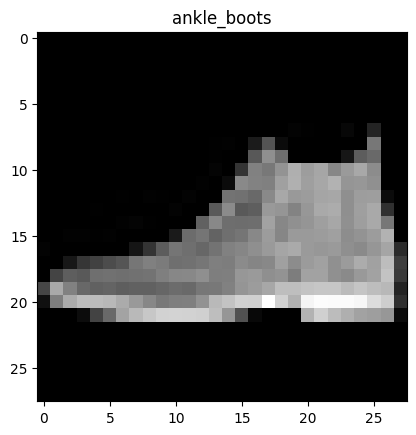

In [ ]:
# Display the first test image with matplotlib
plt.imshow(test_x[0].reshape(28, 28), cmap='gray')
plt.title(predicted_label)
plt.show()